In [19]:
import sys
from pathlib import Path
sys.path.append(str(Path(sys.argv[0]).absolute().parent.parent.parent.parent))
# add the entire folder to path
from src.utils import utils

In [20]:
import pandas as pd

df = pd.read_parquet("../data/2022-10-26_hiscore_data.parquet.gzip")
df.head()


,name,created_at,updated_at,possible_ban,confirmed_ban,label_id,label,account_status,id,timestamp,...,tombs_of_amascut,tombs_of_amascut_expert,tzkal_zuk,tztok_jad,venenatis,vetion,vorkath,wintertodt,zalcano,zulrah
0,3BA604236FB0319D5937E31388B0C64C,2021-03-14 20:22:45,2022-10-26 01:01:21,0,0,1,Real_Player,not banned,59568395,2022-10-26 01:04:13,...,0,0,0,0,0,0,0,0,0,0
1,5A02B5A7F38AD2623A9C5E68DF01EC2F,2021-03-14 20:42:37,2022-10-26 08:11:05,0,0,1,Real_Player,not banned,59622273,2022-10-26 08:16:02,...,0,0,0,10,0,0,114,73,0,1256
2,E666957B20A95519E6306D75FEC4DE19,2021-03-14 22:17:40,2022-10-26 04:14:28,1,0,1,Real_Player,not banned,59615490,2022-07-27 06:41:21,...,0,0,0,20,0,0,1000,500,0,400
3,02726CE8822537806154B747927223D0,2021-03-14 22:18:40,2022-10-26 01:34:01,0,0,1,Real_Player,not banned,58905027,2022-10-26 01:34:05,...,0,0,0,0,0,0,3956,204,1068,0
4,A5ECC15B4DFBFCAEF1522D4D78150146,2021-03-14 22:19:32,2022-10-26 15:53:38,0,0,1,Real_Player,not banned,59215937,2022-10-26 15:53:45,...,0,0,0,0,0,0,0,115,0,0


In [21]:
df.columns

Index(['name', 'created_at', 'updated_at', 'possible_ban', 'confirmed_ban',
       'label_id', 'label', 'account_status', 'id', 'timestamp', 'ts_date',
       'Player_id', 'total', 'attack', 'defence', 'strength', 'hitpoints',
       'ranged', 'prayer', 'magic', 'cooking', 'woodcutting', 'fletching',
       'fishing', 'firemaking', 'crafting', 'smithing', 'mining', 'herblore',
       'agility', 'thieving', 'slayer', 'farming', 'runecraft', 'hunter',
       'construction', 'league', 'bounty_hunter_hunter', 'bounty_hunter_rogue',
       'cs_all', 'cs_beginner', 'cs_easy', 'cs_medium', 'cs_hard', 'cs_elite',
       'cs_master', 'lms_rank', 'soul_wars_zeal', 'abyssal_sire',
       'alchemical_hydra', 'barrows_chests', 'bryophyta', 'callisto',
       'cerberus', 'chambers_of_xeric', 'chambers_of_xeric_challenge_mode',
       'chaos_elemental', 'chaos_fanatic', 'commander_zilyana',
       'corporeal_beast', 'crazy_archaeologist', 'dagannoth_prime',
       'dagannoth_rex', 'dagannoth_supreme'

# optimizing dataframe

In [22]:
import numpy as np

df['total'] = df['total'].astype('int32')
df[utils.SKILLS] = df[utils.SKILLS].astype('int32')
df[utils.MINIGAMES] = df[utils.MINIGAMES].astype('int16')
df[utils.BOSSES] = df[utils.BOSSES].astype('int16')
df.set_index("Player_id", inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223558 entries, 1 to 49835352
Data columns (total 97 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   name                              223558 non-null  object        
 1   created_at                        223558 non-null  datetime64[ns]
 2   updated_at                        223558 non-null  datetime64[ns]
 3   possible_ban                      223558 non-null  int64         
 4   confirmed_ban                     223558 non-null  int64         
 5   label_id                          223558 non-null  int64         
 6   label                             223558 non-null  object        
 7   account_status                    223558 non-null  object        
 8   id                                223558 non-null  int64         
 9   timestamp                         223558 non-null  datetime64[ns]
 10  ts_date                       

In [24]:
df.describe()

,possible_ban,confirmed_ban,label_id,id,total,attack,defence,strength,hitpoints,ranged,...,tombs_of_amascut,tombs_of_amascut_expert,tzkal_zuk,tztok_jad,venenatis,vetion,vorkath,wintertodt,zalcano,zulrah
count,223558.000000,223558.000000,223558.000000,2.235580e+05,2.235580e+05,2.235580e+05,2.235580e+05,2.235580e+05,2.235580e+05,2.235580e+05,...,223558.000000,223558.000000,223558.000000,223558.000000,223558.000000,223558.000000,223558.000000,223558.000000,223558.000000,223558.000000
mean,0.719232,0.701044,36.220502,1.258947e+08,5.693070e+07,3.696450e+06,3.224837e+06,5.566644e+06,7.157518e+06,6.598349e+06,...,3.330992,1.611202,0.191364,1.538880,20.970303,8.170112,158.115773,64.183679,51.101705,242.511031
std,0.449376,0.457802,37.217955,1.309132e+08,1.306905e+08,9.098872e+06,7.787324e+06,1.481015e+07,1.702153e+07,1.765460e+07,...,21.416404,17.784428,2.957720,8.595598,210.345348,112.889284,1009.724370,249.023029,465.987360,1268.890231
min,0.000000,0.000000,1.000000,1.277322e+07,-2.146505e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-32599.000000,0.000000,0.000000,-32520.000000
25%,0.000000,0.000000,1.000000,5.895858e+07,1.645410e+06,4.472000e+03,9.402500e+02,4.176000e+03,8.035250e+03,1.200000e+01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,17.000000,5.978628e+07,8.219193e+06,1.304750e+05,1.210150e+05,1.869075e+05,3.720505e+05,1.512150e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,89.000000,1.572458e+08,4.280622e+07,2.151688e+06,2.071470e+06,4.137697e+06,5.189112e+06,3.265825e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,91.000000,8.612193e+08,2.122036e+09,2.000000e+08,2.000000e+08,2.000000e+08,2.000000e+08,2.000000e+08,...,1063.000000,1159.000000,353.000000,724.000000,22172.000000,10577.000000,32724.000000,15503.000000,31062.000000,32320.000000


In [25]:
df_skill_features = utils.get_ratio(df, utils.SKILLS)
df_skill_features.describe()

,attack_ratio,defence_ratio,strength_ratio,hitpoints_ratio,ranged_ratio,prayer_ratio,magic_ratio,cooking_ratio,woodcutting_ratio,fletching_ratio,...,mining_ratio,herblore_ratio,agility_ratio,thieving_ratio,slayer_ratio,farming_ratio,runecraft_ratio,hunter_ratio,construction_ratio,total
count,223217.000000,223217.000000,223217.000000,223217.000000,223217.000000,223217.000000,223217.000000,223217.000000,223217.000000,223217.000000,...,223217.000000,223217.000000,223217.000000,223217.000000,223217.000000,223217.000000,223217.000000,223217.000000,223217.000000,2.235580e+05
mean,0.057647,0.049439,0.075928,0.090458,0.068186,0.031101,0.106872,0.036826,0.048389,0.035638,...,0.051209,0.015205,0.031325,0.017585,0.011909,0.013113,0.019424,0.029194,0.007888,5.693070e+07
std,0.076344,0.067680,0.098073,0.084411,0.111872,0.098740,0.215906,0.098597,0.140088,0.145614,...,0.150629,0.089153,0.127457,0.084173,0.024512,0.036788,0.088589,0.134779,0.030658,1.306905e+08
min,-4.219835,-4.219835,-4.219835,-4.219835,-4.219835,-4.219835,-4.219835,-4.219835,-4.219835,-4.219835,...,-4.219835,-4.219835,-1.226767,-4.219835,-4.219835,-4.219835,-0.953328,-4.219835,-4.219835,-2.146505e+09
25%,0.001645,0.000279,0.001507,0.005796,0.000007,0.000038,0.000074,0.000063,0.000100,0.000000,...,0.000048,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.645410e+06
50%,0.033691,0.029905,0.047409,0.077926,0.004415,0.007549,0.033659,0.005117,0.008475,0.000255,...,0.005796,0.000077,0.002888,0.000327,0.000060,0.000000,0.000000,0.000000,0.000000,8.219193e+06
75%,0.077884,0.066927,0.109119,0.151384,0.099206,0.023347,0.082615,0.035299,0.033897,0.016169,...,0.027549,0.009071,0.016997,0.008775,0.014794,0.008430,0.004264,0.007671,0.006399,4.280622e+07
max,1.432315,1.432315,1.432315,1.432315,1.432315,1.432315,1.432315,1.432315,1.432315,1.432315,...,1.432315,1.432315,1.235903,1.432315,1.432315,1.432315,1.000000,1.432315,1.432315,2.122036e+09


In [26]:
df_boss_features = utils.get_ratio(df, utils.BOSSES)
df_boss_features.describe()

,abyssal_sire_ratio,alchemical_hydra_ratio,barrows_chests_ratio,bryophyta_ratio,callisto_ratio,cerberus_ratio,chambers_of_xeric_ratio,chambers_of_xeric_challenge_mode_ratio,chaos_elemental_ratio,chaos_fanatic_ratio,...,tombs_of_amascut_expert_ratio,tzkal_zuk_ratio,tztok_jad_ratio,venenatis_ratio,vetion_ratio,vorkath_ratio,wintertodt_ratio,zalcano_ratio,zulrah_ratio,total
count,73222.000000,73222.000000,73222.000000,73222.000000,73222.000000,73222.000000,73222.000000,73222.000000,73222.000000,73222.000000,...,73222.000000,73222.000000,73222.000000,73222.000000,73222.000000,73222.000000,73222.000000,73222.000000,73222.000000,223558.000000
mean,0.008680,0.019698,0.069615,0.025018,0.011133,0.018614,0.017325,0.001343,0.003393,0.003338,...,0.000277,0.000602,0.000834,0.016328,0.003214,0.079472,0.140027,0.040715,0.110831,2001.137512
std,0.025176,0.060486,0.193243,0.140648,0.075390,0.042553,0.073189,0.008624,0.027489,0.029692,...,0.002495,0.023390,0.016995,0.094631,0.032834,0.223149,0.287542,0.176976,0.263702,6611.197966
min,-1.430678,-6.778761,-0.242594,-0.209440,-0.031193,-0.526039,-1.410029,-0.014749,-0.010918,-0.312684,...,0.000000,-0.000062,-0.009795,-0.037869,-0.021024,-29.734513,-2.359882,-8.471976,-4.795511,-57410.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010692,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.031158,0.000000,0.000000,0.013722,0.002261,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.052910,0.075262,0.000000,0.075953,290.000000
max,0.887097,3.402105,1.787368,1.000000,1.000000,0.963062,1.334035,1.000000,1.000000,1.000000,...,0.327543,1.000000,1.000000,1.000000,1.000000,3.750299,1.000000,1.000000,1.593684,177581.000000


In [27]:
df_minigames_features = utils.get_ratio(df, utils.MINIGAMES)
df_minigames_features.describe()

,league_ratio,bounty_hunter_hunter_ratio,bounty_hunter_rogue_ratio,cs_all_ratio,cs_beginner_ratio,cs_easy_ratio,cs_medium_ratio,cs_hard_ratio,cs_elite_ratio,cs_master_ratio,lms_rank_ratio,soul_wars_zeal_ratio,total
count,80836.0,80836.000000,80836.000000,80836.000000,80836.000000,80836.000000,80836.000000,80836.000000,80836.000000,80836.000000,80836.000000,80836.000000,223558.000000
mean,0.0,0.020249,0.011063,0.303339,0.102671,0.074563,0.092266,0.083994,0.018603,0.011207,0.178892,0.103154,400.246992
std,0.0,0.119705,0.080866,0.541499,0.222962,0.290123,0.171305,0.157765,0.059451,0.042043,0.343229,1.001638,1895.598126
min,0.0,-0.109615,-0.014294,-29.020721,-0.412090,-0.596424,-0.421817,-0.308216,-0.085143,-0.104025,-1.584653,-273.883929,-60668.000000
25%,0.0,0.000000,0.000000,0.009709,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,0.000000,0.497047,0.004796,0.012389,0.036477,0.019612,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.000000,0.000000,0.500000,0.080000,0.079427,0.125000,0.135417,0.020000,0.006098,0.120773,0.000000,36.000000
max,0.0,1.000000,1.000000,137.357143,6.741071,68.883929,22.232143,24.571429,9.035714,5.892857,1.064021,4.630481,65168.000000


# look at skill ratio real vs bots

In [31]:
df_player = df[
    [
        "name",
        "created_at",
        "updated_at",
        "possible_ban",
        "confirmed_ban",
        "label_id",
        "label",
        "account_status",
    ]
]
df_player["bot"] = np.where(df_player["account_status"] == "banned",1,0)
df_player = df_player.merge(df_skill_features, left_index=True, right_index=True)

C:\Users\creyfye\AppData\Local\Temp\ipykernel_10024\2471760508.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_player["bot"] = np.where(df_player["account_status"] == "banned",1,0)


In [103]:
import matplotlib.pyplot as plt

def compare_ratio(ratio:str, _df:pd.DataFrame):
        plt.figure(figsize=(12,5))
        plt.xlabel(f'{ratio}')

        __df = _df.query("bot==1")[ratio]
        ax1 = __df.plot(
                kind='hist',
                alpha=0.7,
                bins=100,
                title=f'Bins of real player & bots compared to {ratio}',
                rot=45,
                grid=True,
                figsize=(12,8),
                fontsize=15, 
                color=['#A0E8AF'],
                label="bot"
        )
        __df = _df.query("bot==0")[ratio]
        ax2 = __df.plot(
                kind='hist',
                alpha=0.7,
                bins=100,
                title=f'Bins of real player & bots compared to {ratio}',
                rot=45,
                grid=True,
                figsize=(12,8),
                fontsize=15, 
                color=['#FFCF56'],
                label="not bot"
        )


        h1, l1 = ax1.get_legend_handles_labels()
        h2, l2 = ax2.get_legend_handles_labels()


        plt.legend(h1, l1, loc=2)
        plt.show()

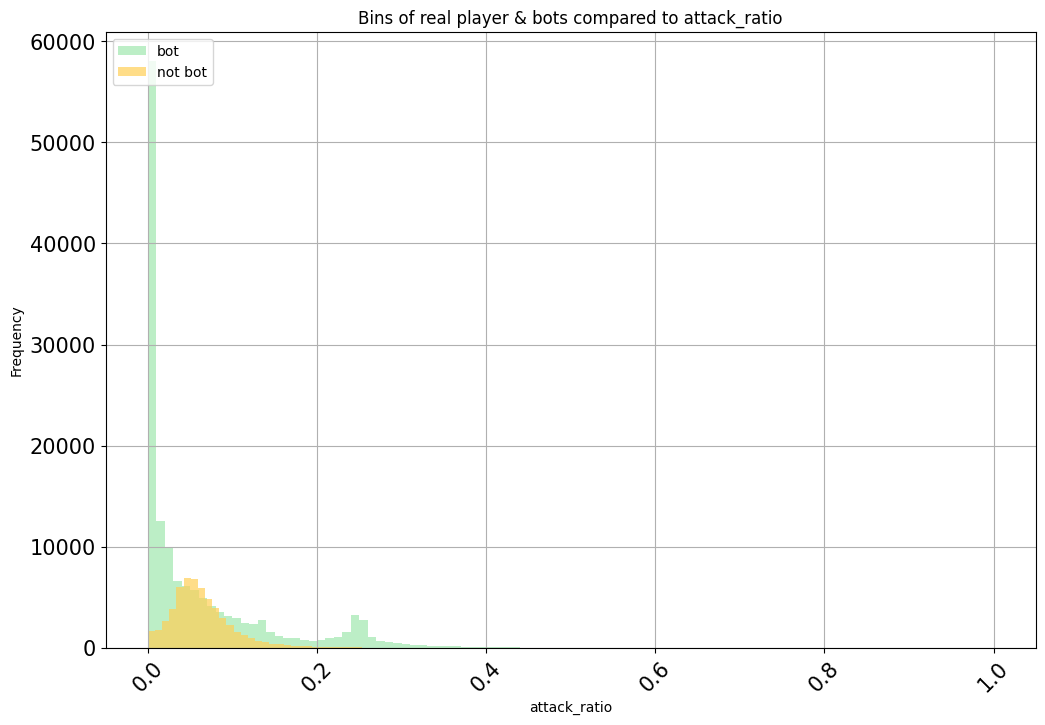

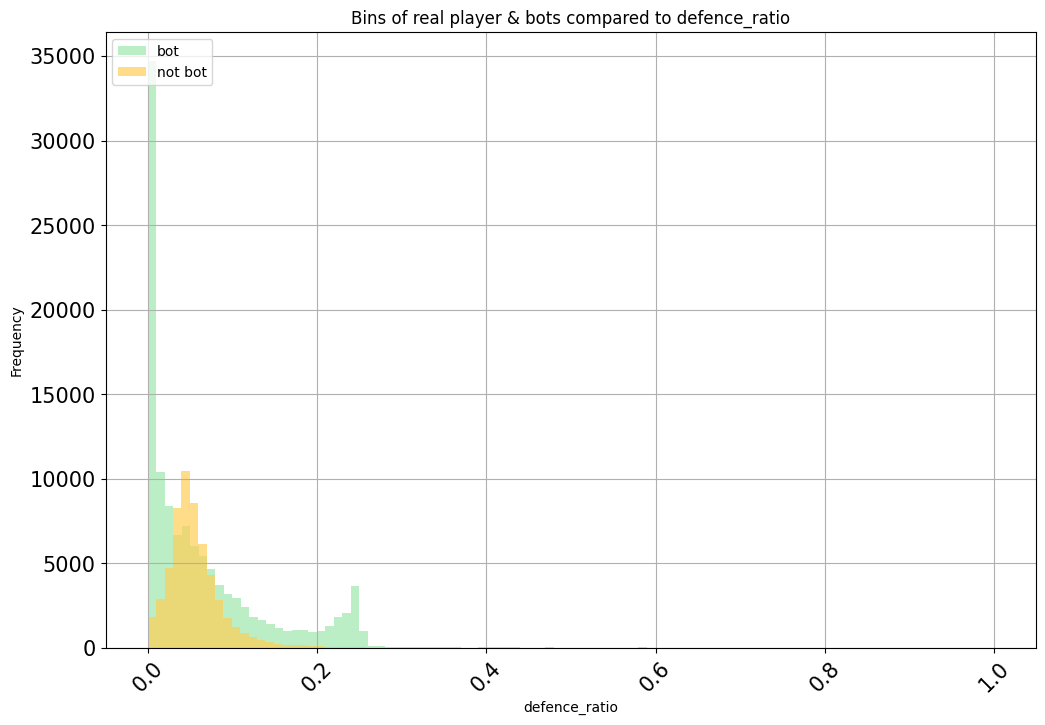

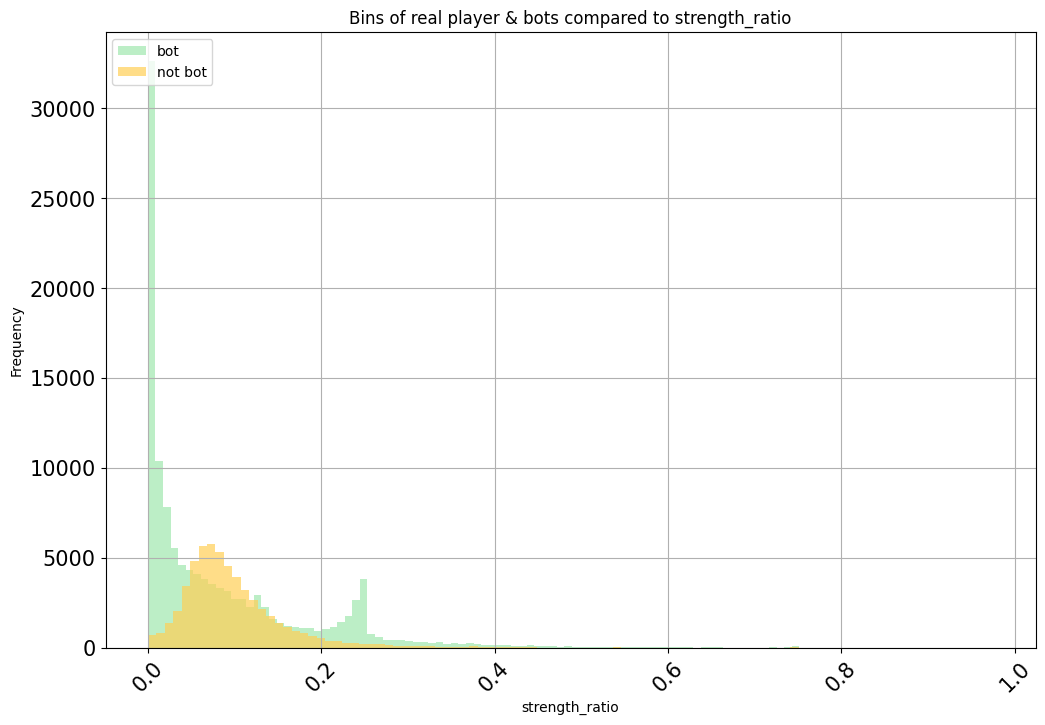

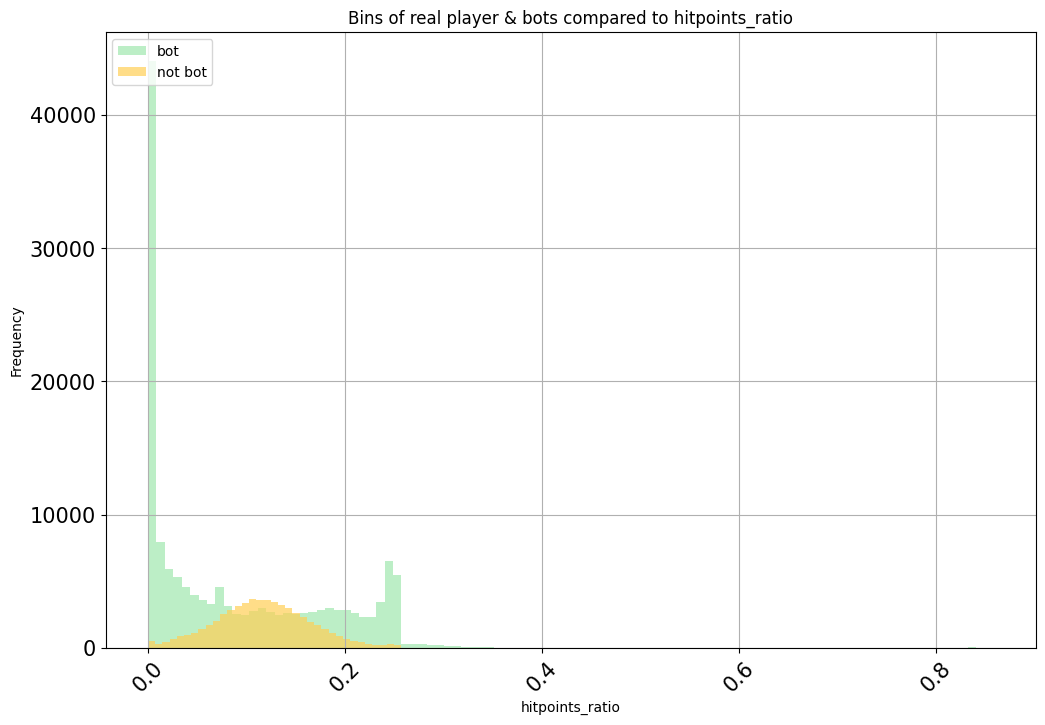

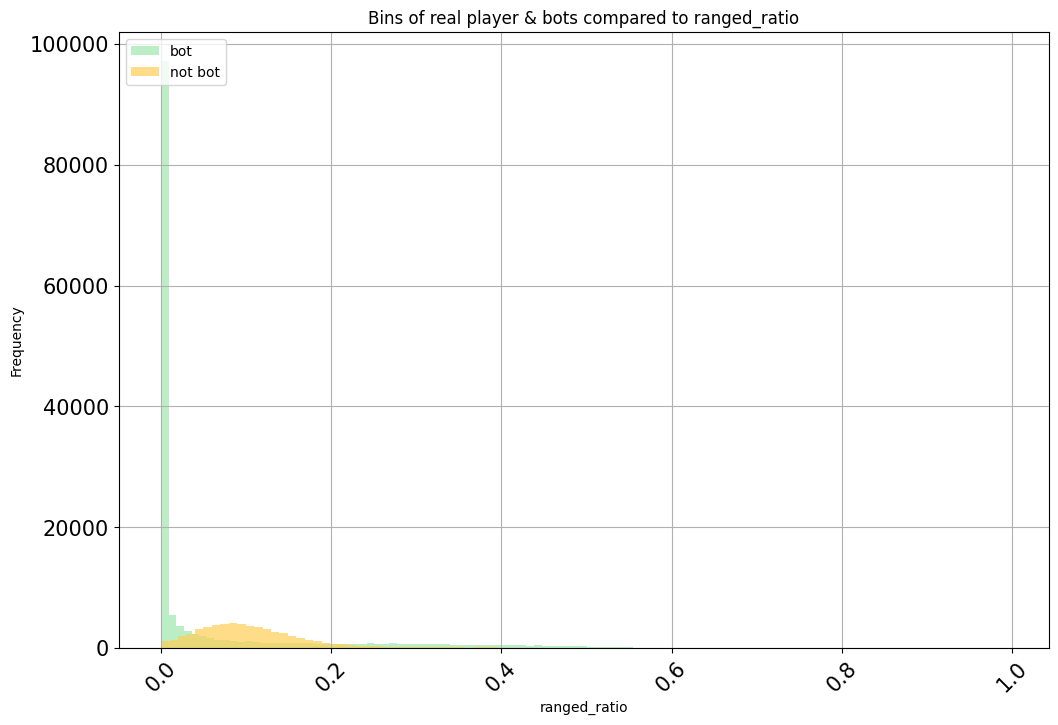

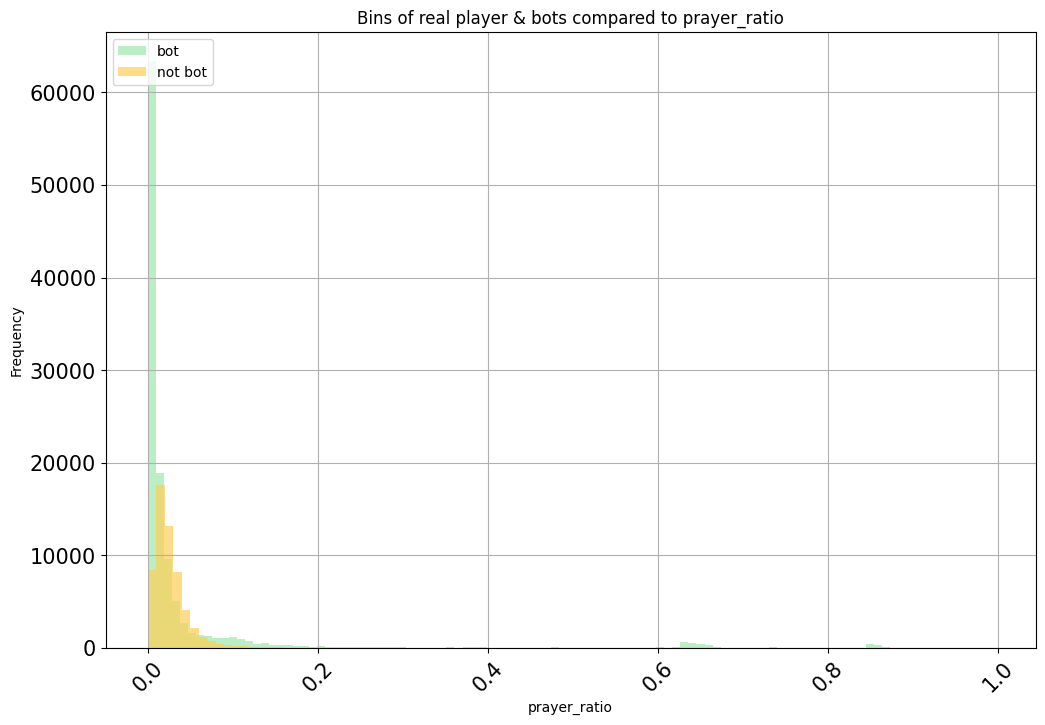

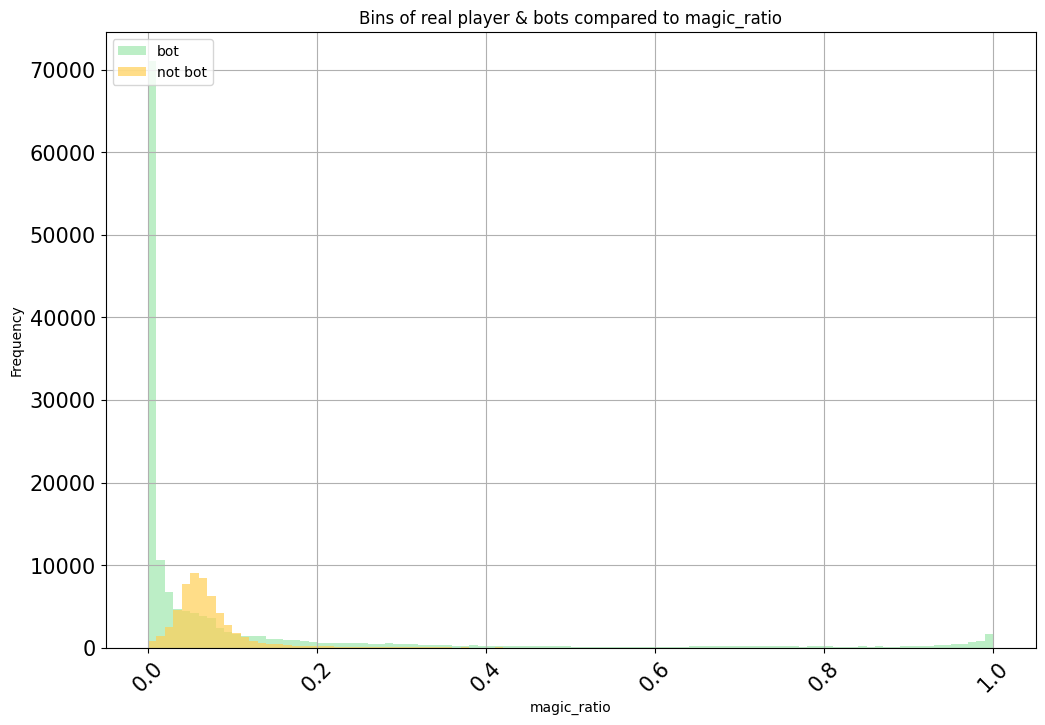

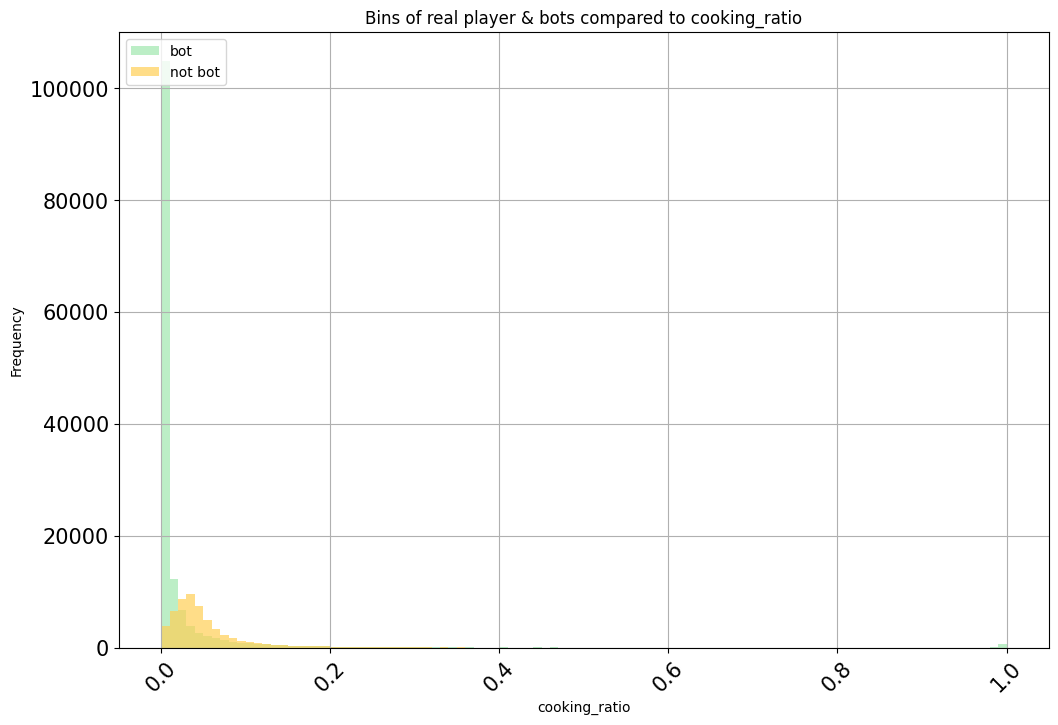

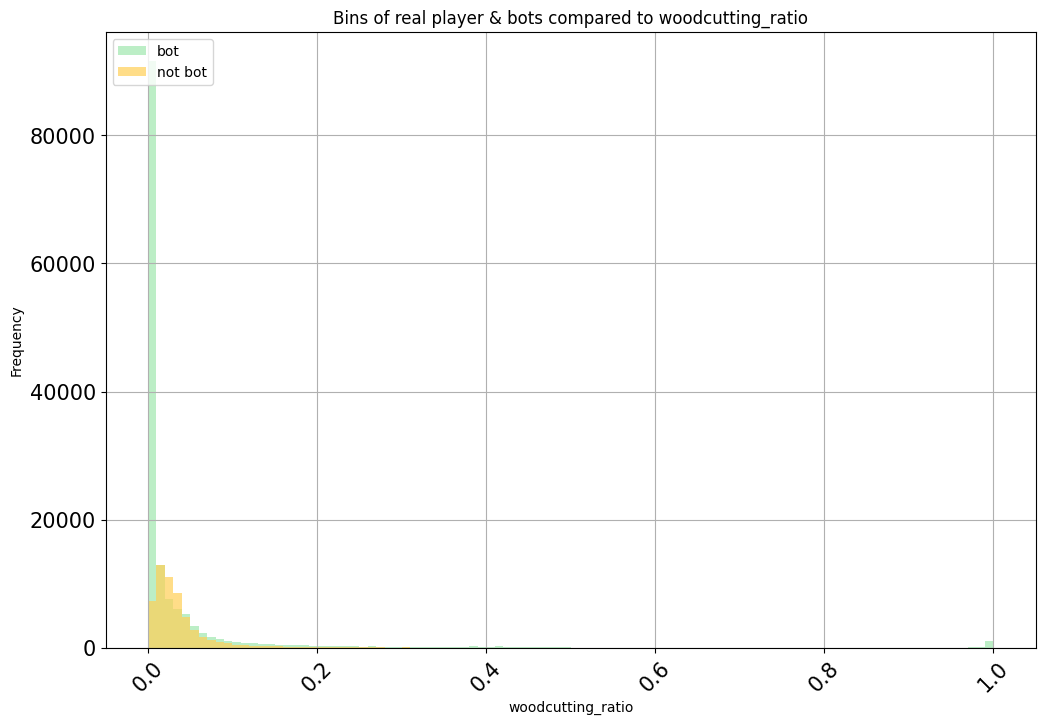

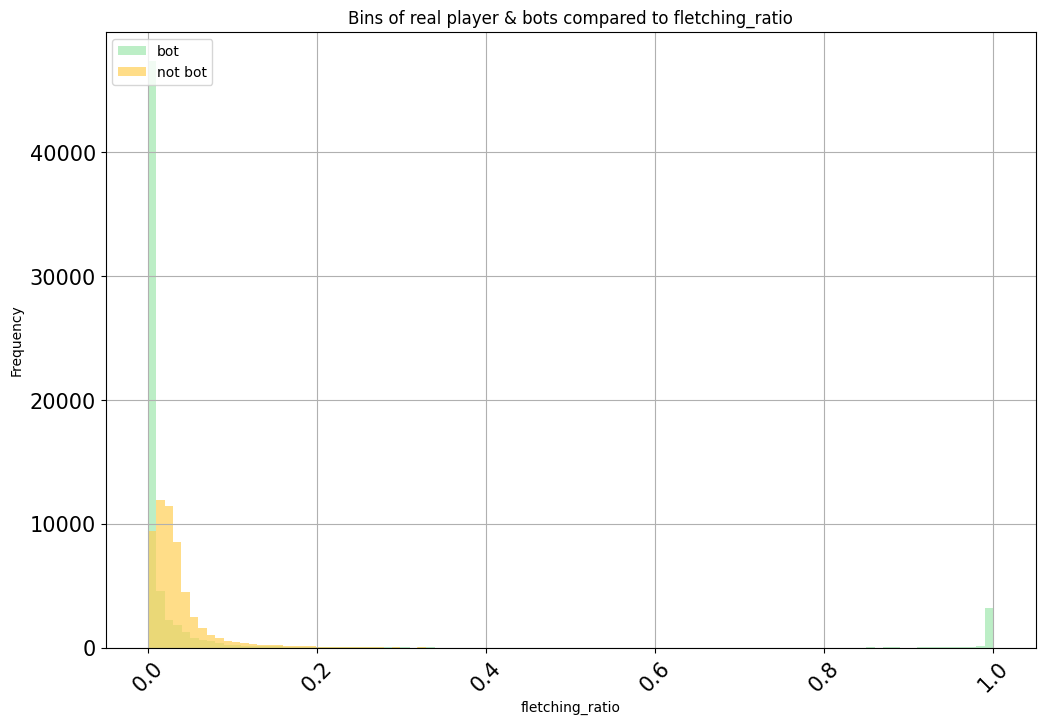

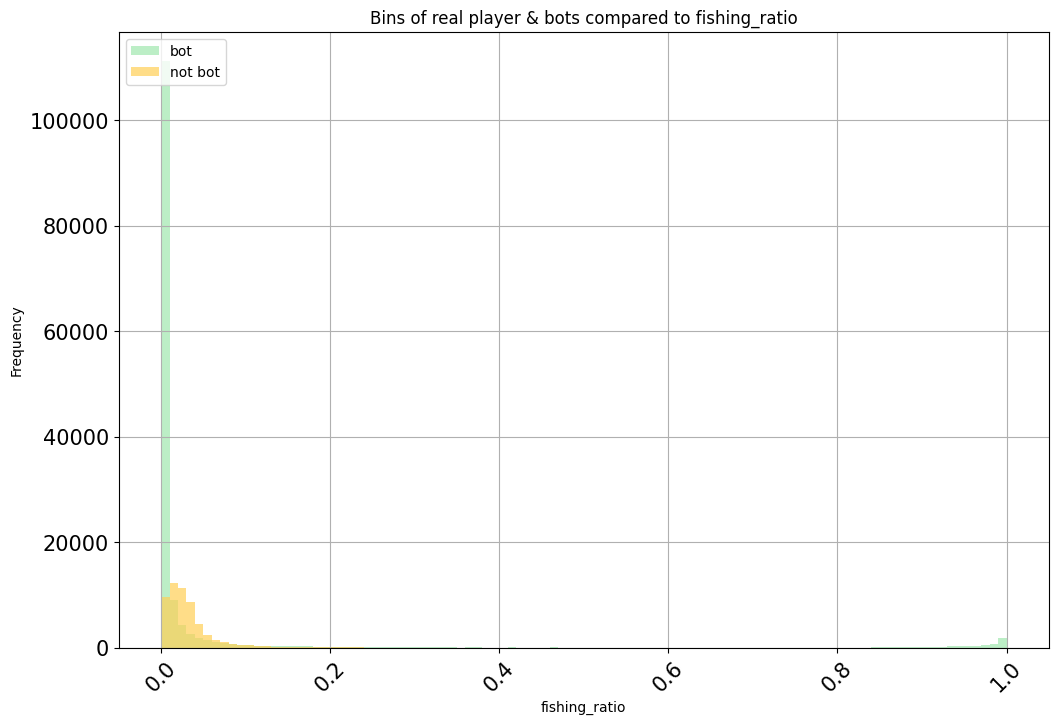

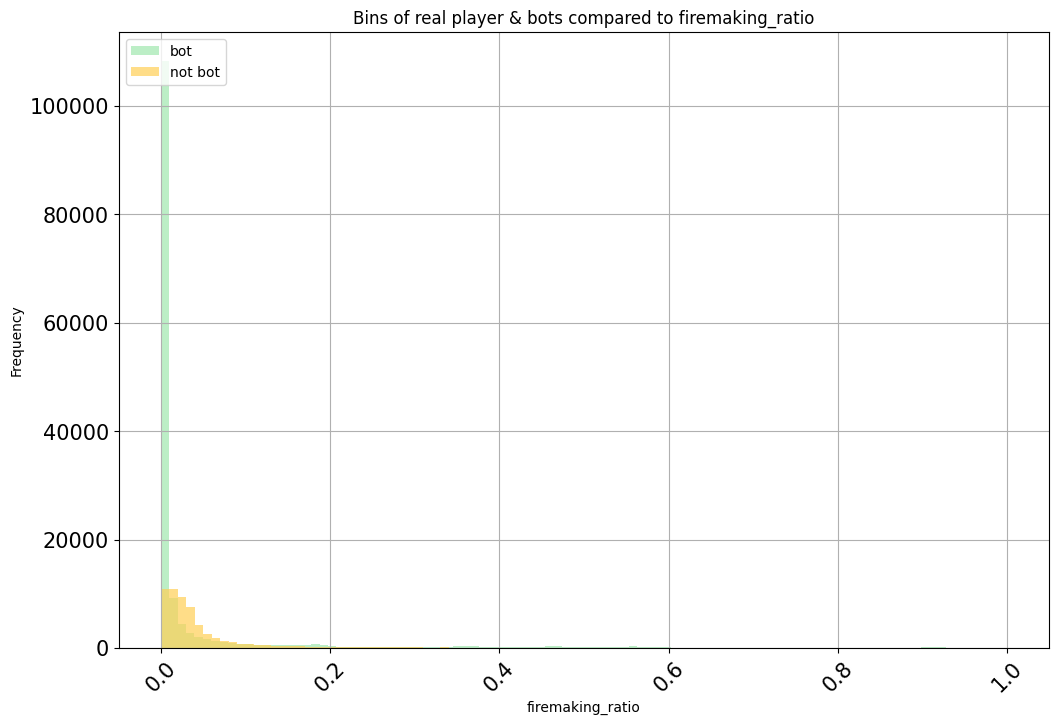

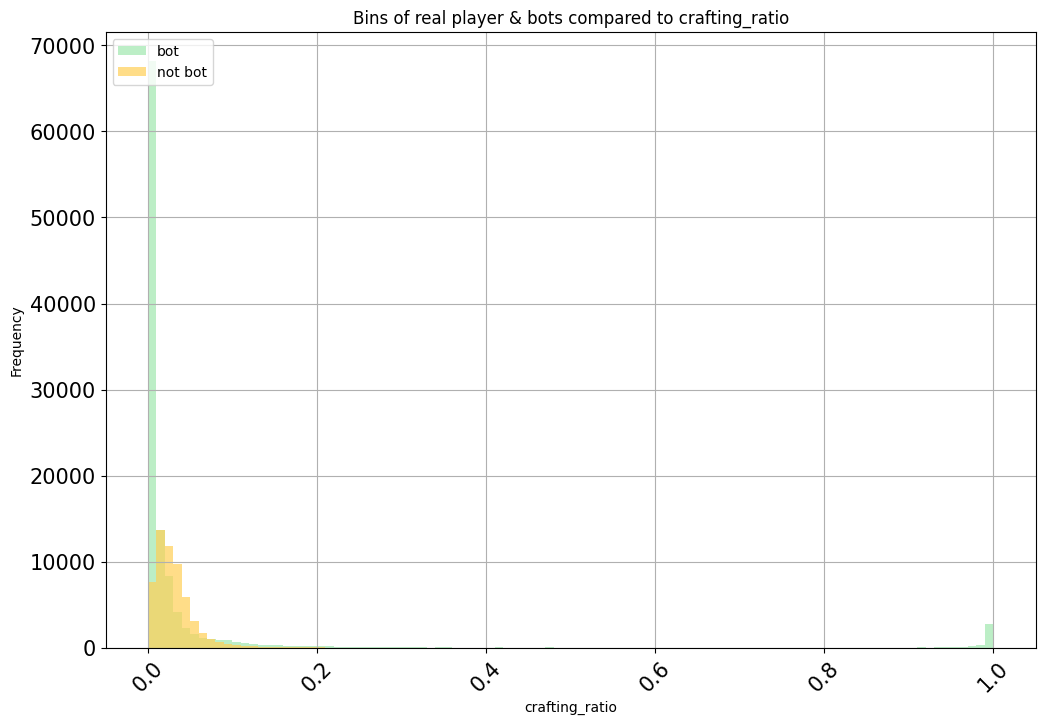

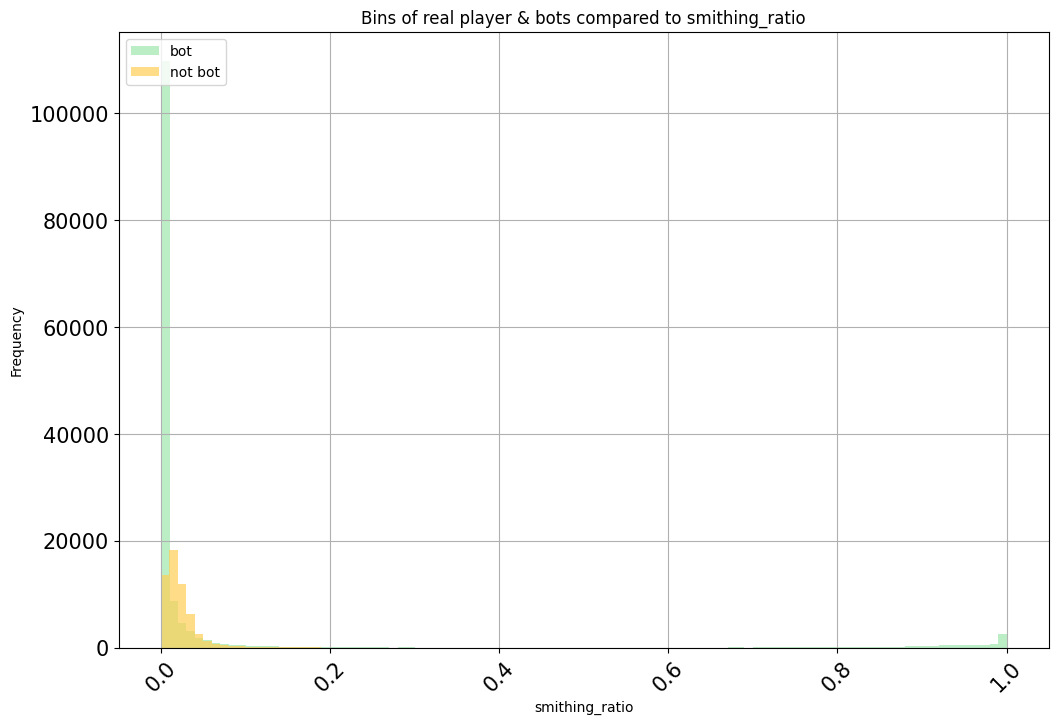

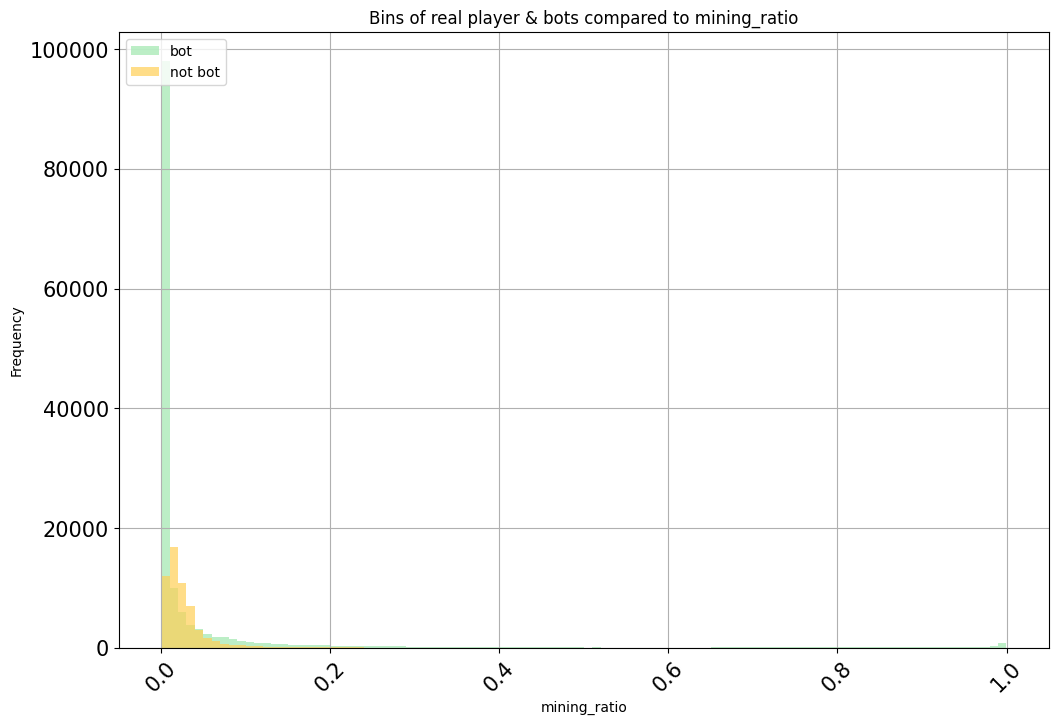

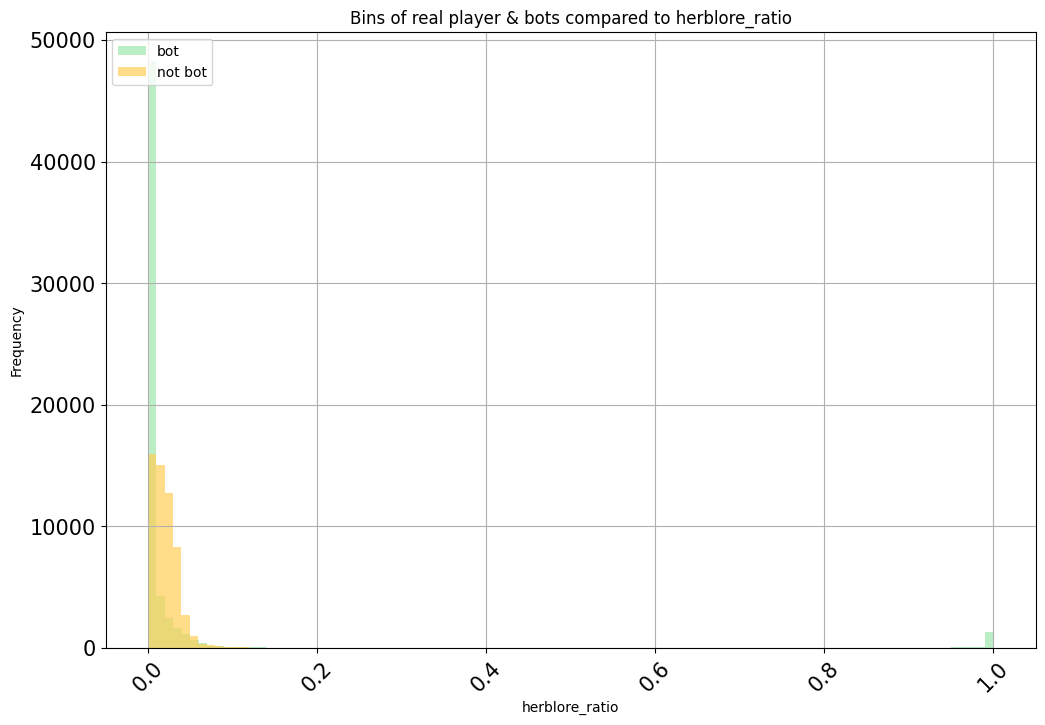

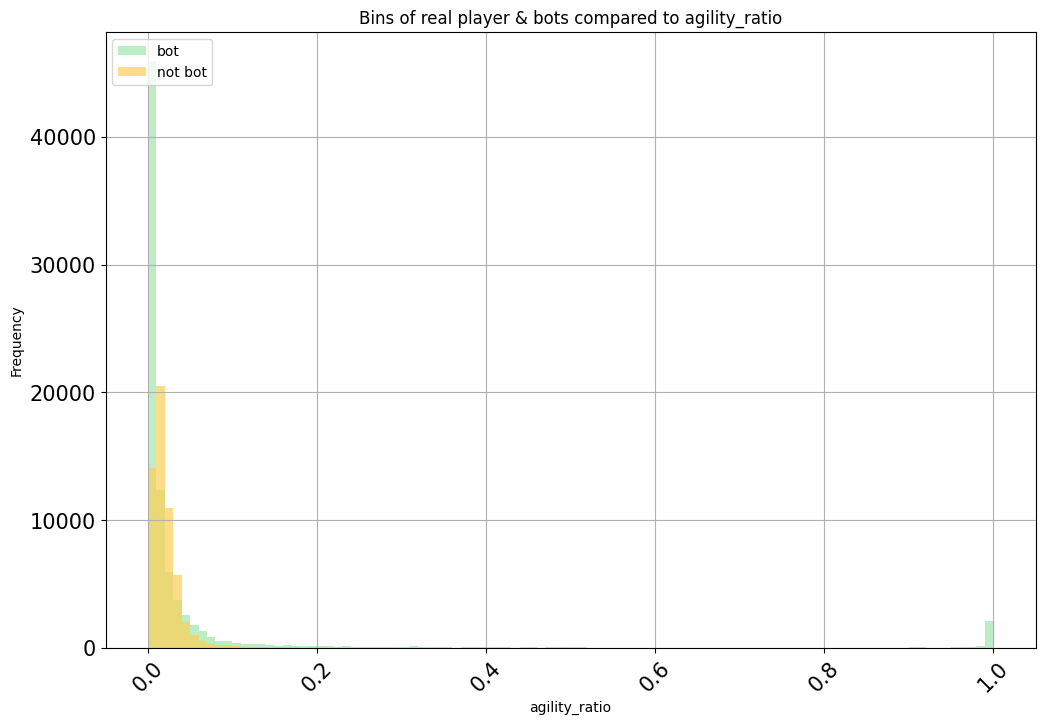

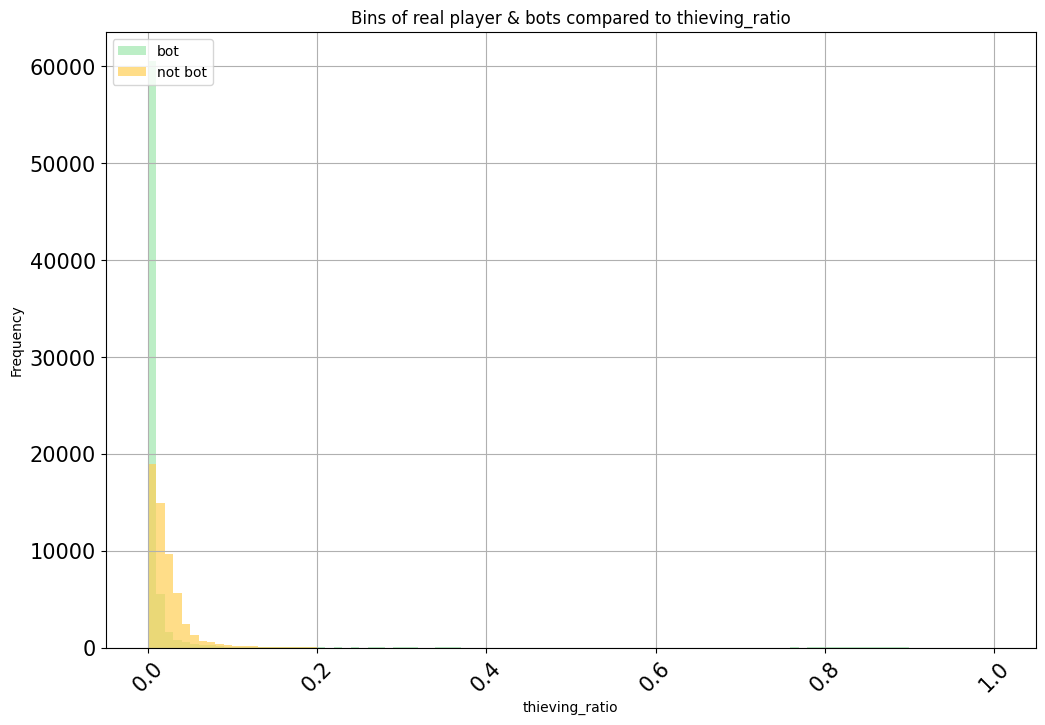

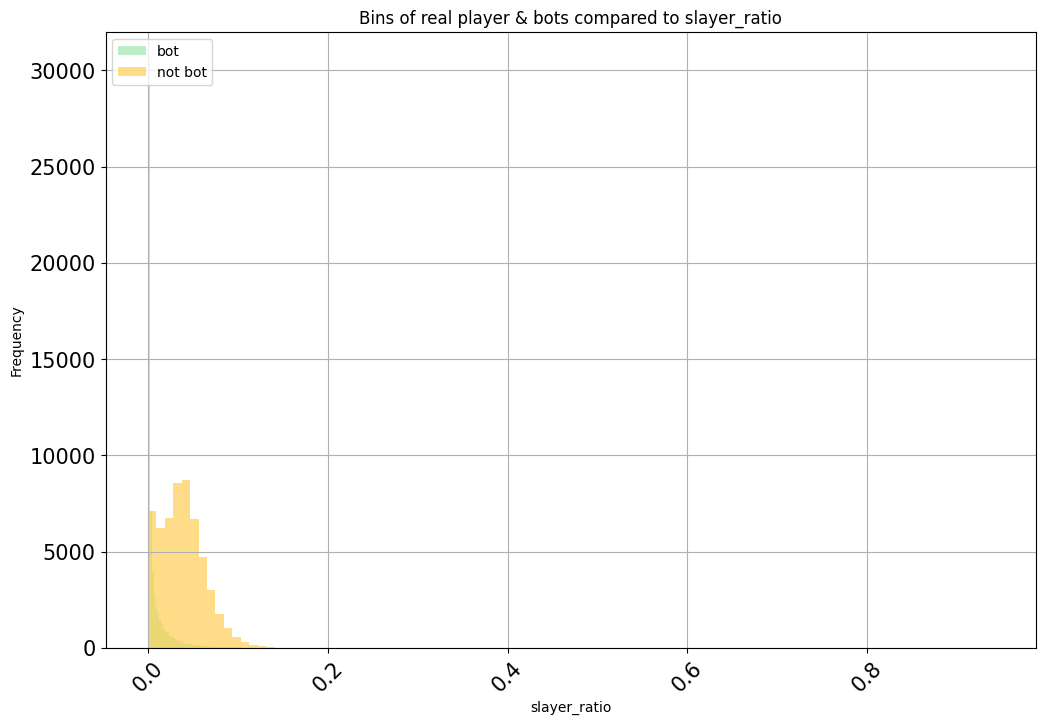

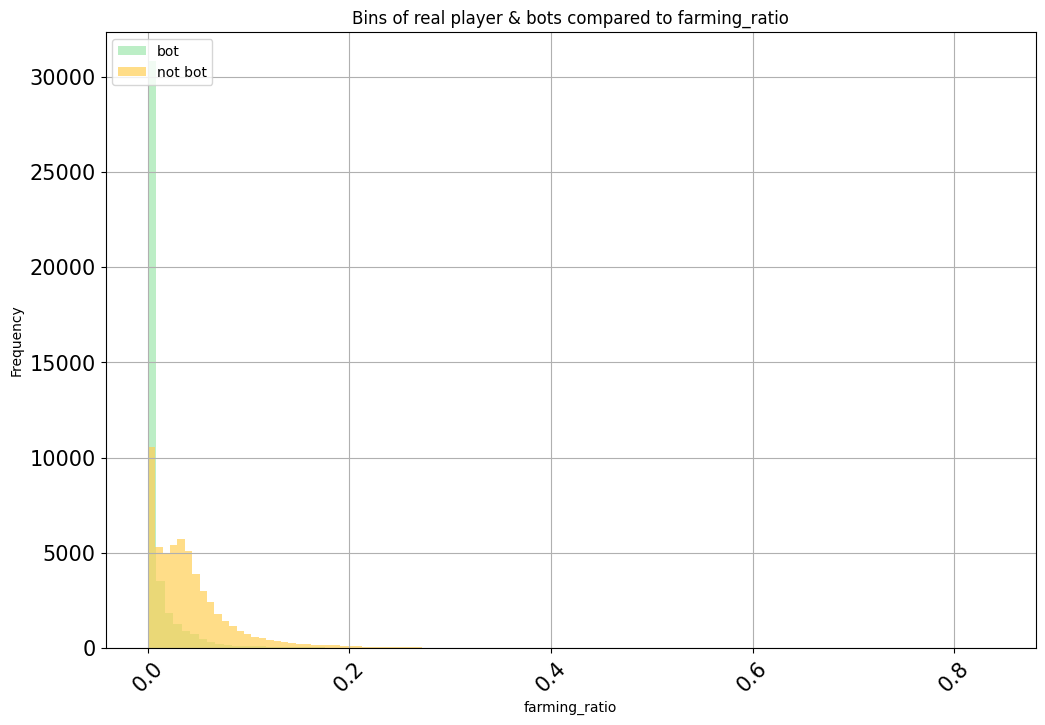

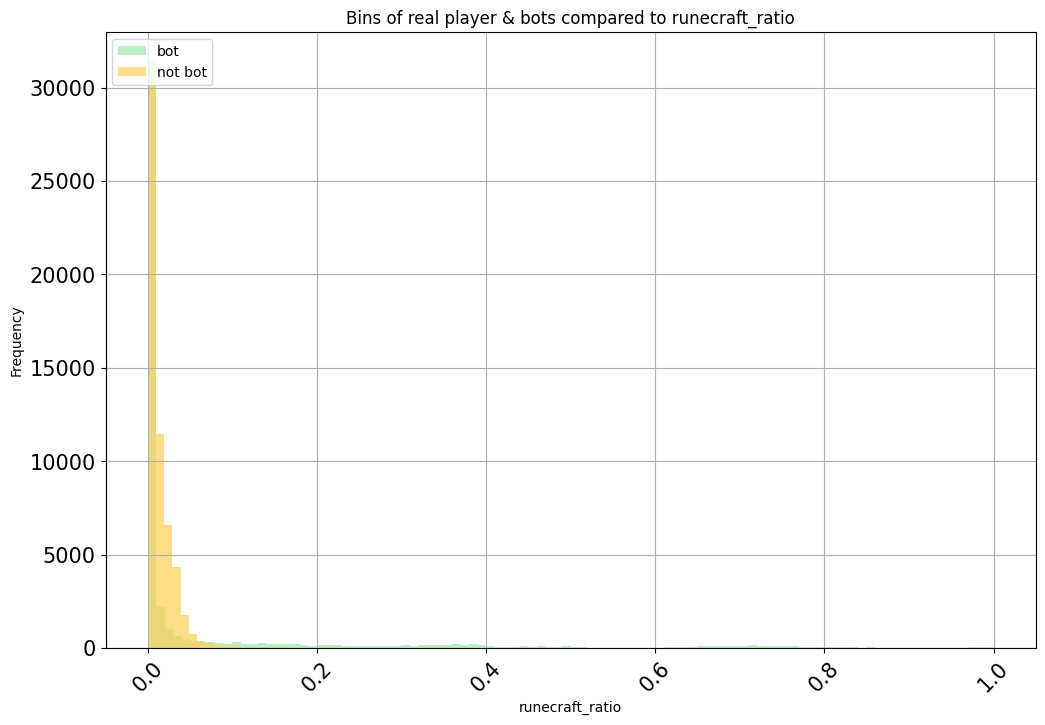

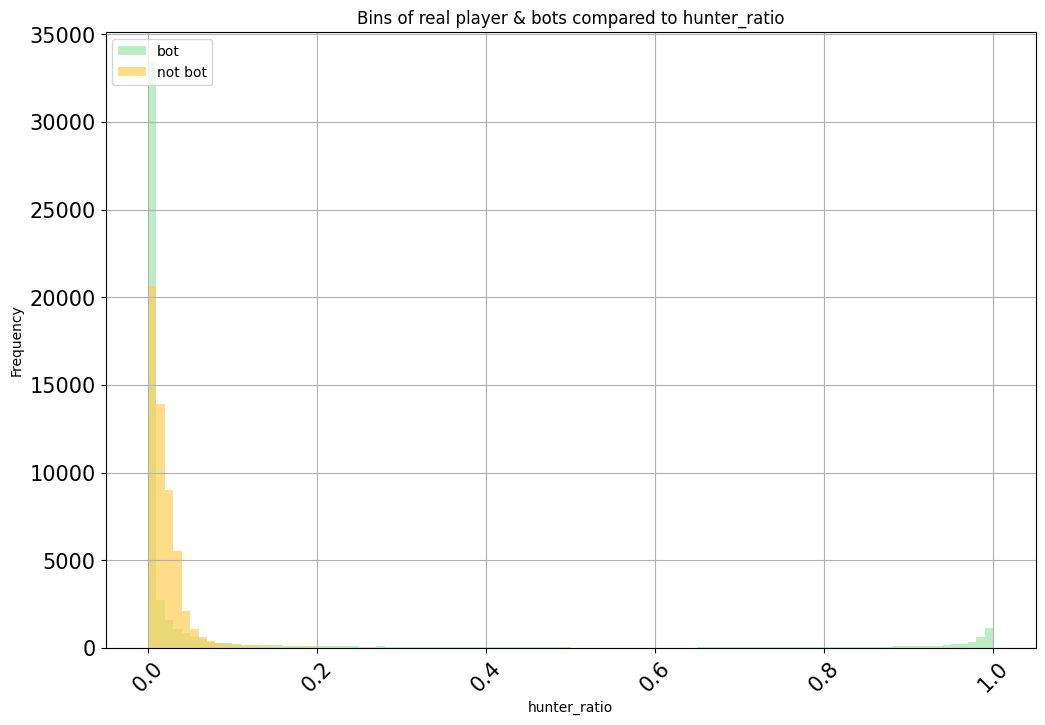

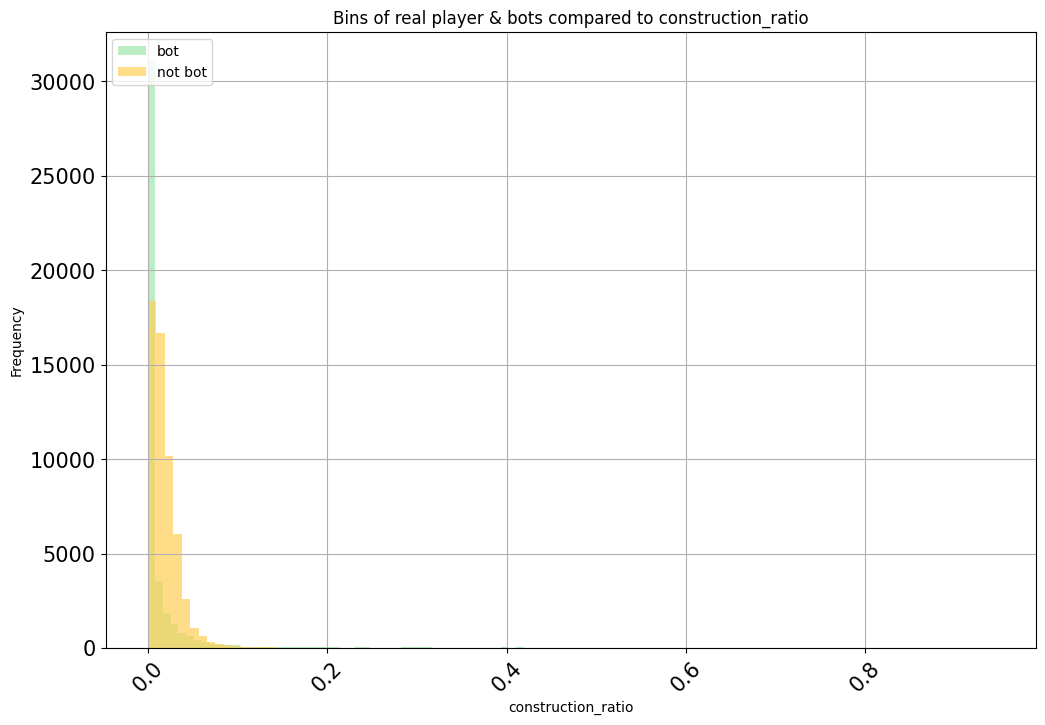

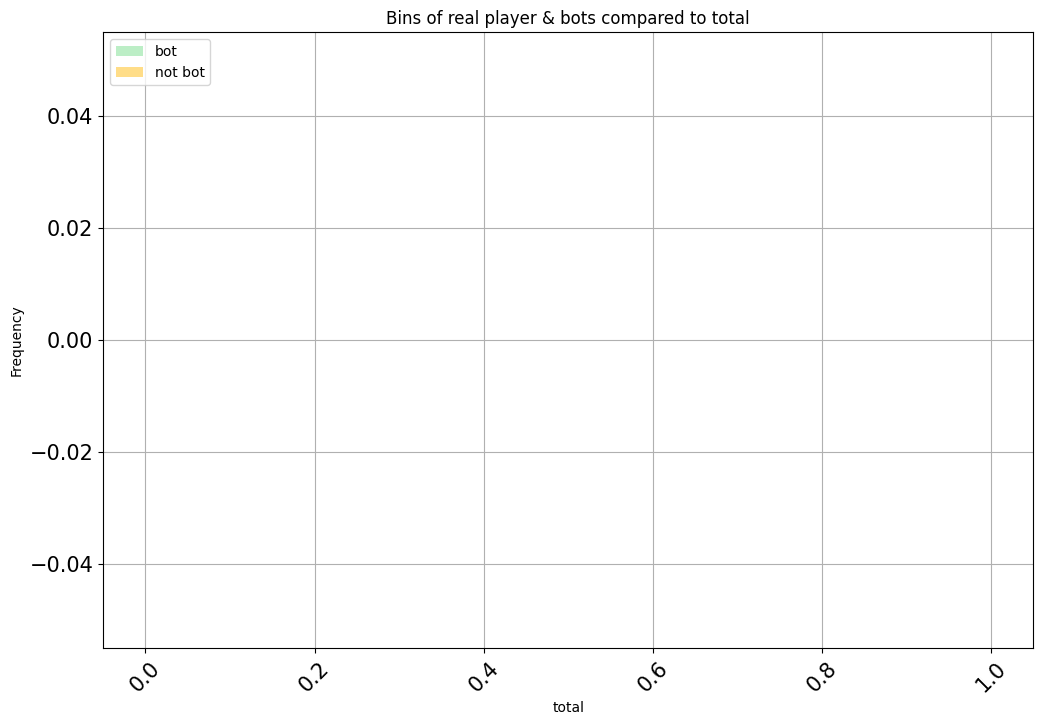

In [108]:
for skill_ratio in df_skill_features.columns:
    _df = df_player.copy()
    _df = _df.query(f"{skill_ratio} > 0 and {skill_ratio} < 1")
    compare_ratio(skill_ratio,_df)